In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
performance_decision=pd.read_csv('PerformanceDecision.csv',
                                header=[0])
performance_decision

,department,status,age,salary
0,sales,senior,7,10
1,sales,senior,7,10
2,sales,senior,7,10
3,sales,senior,7,10
4,sales,senior,7,10
...,...,...,...,...
160,secretary,junior,6,6
161,secretary,junior,6,6
162,secretary,junior,6,6
163,secretary,junior,6,6


In [3]:
## Setting salary as target variable
y = performance_decision[['status']]
## Setting all other variables except salary as independent
X = performance_decision.loc[:,
                            performance_decision.columns != 'status']
y

,status
0,senior
1,senior
2,senior
3,senior
4,senior
...,...
160,junior
161,junior
162,junior
163,junior


In [4]:
X

,department,age,salary
0,sales,7,10
1,sales,7,10
2,sales,7,10
3,sales,7,10
4,sales,7,10
...,...,...,...
160,secretary,6,6
161,secretary,6,6
162,secretary,6,6
163,secretary,6,6


In [5]:
## encoding categories to numerical attributes
le = LabelEncoder()
department_encoding = le.fit_transform(X['department'])

## Dropping data, keeping header
X.drop('department',
      axis=1,
      inplace=True)

## Subsituting encoded attributes
X['department'] = department_encoding

## Repeat for status
status_encoding = le.fit_transform(y['status'])
y.drop('status',
      axis=1,
      inplace=True)
y['status'] = status_encoding
X

,age,salary,department
0,7,10,1
1,7,10,1
2,7,10,1
3,7,10,1
4,7,10,1
...,...,...,...
160,6,6,2
161,6,6,2
162,6,6,2
163,6,6,2


In [6]:
## Running model
decision_tree = tree.DecisionTreeClassifier(criterion='gini').fit(X, y)

In [7]:
## Converting ints to strings for class_label usage in plot
salary_classes = np.unique(y['status'])
salary_classes = salary_classes.astype('str')

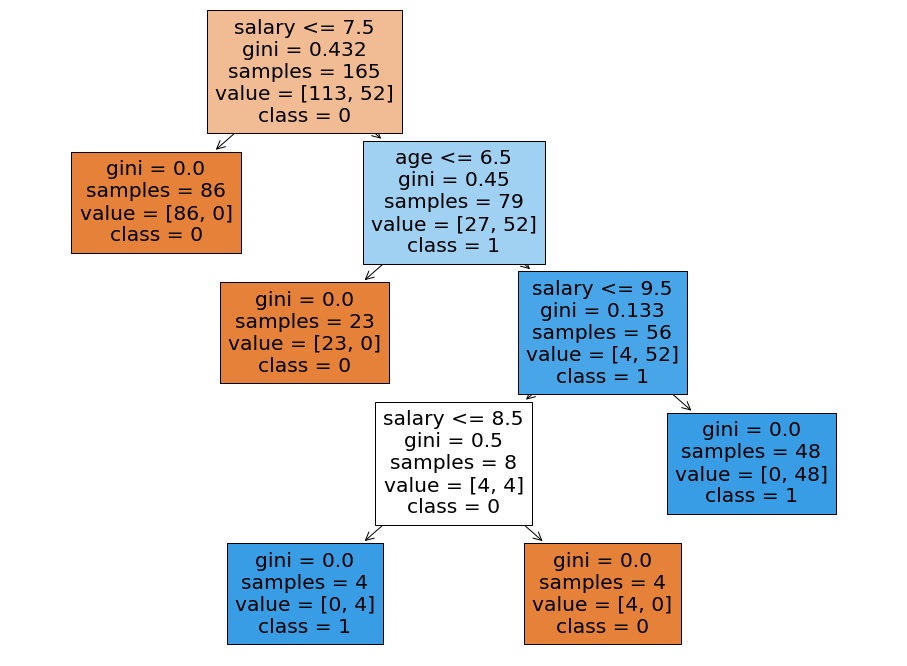

In [8]:
## Plotting results
tree_plot = plt.gcf()
tree_plot.set_size_inches(16,12)
tree.plot_tree(decision_tree,
               feature_names = X.columns,
               class_names = salary_classes,
               filled = True);

## Saving to file
tree_plot.savefig('decision_tree.png',
                  format = 'png',
                  dip=300)

In [9]:
## Dropping age as independent variable
X_no_age = X.loc[:,
                X.columns != 'age']
X_no_age

,salary,department
0,10,1
1,10,1
2,10,1
3,10,1
4,10,1
...,...,...
160,6,2
161,6,2
162,6,2
163,6,2


In [10]:
## Decision tree with no age variable
decision_tree_no_age = tree.DecisionTreeClassifier(criterion='gini').fit(X_no_age, y)

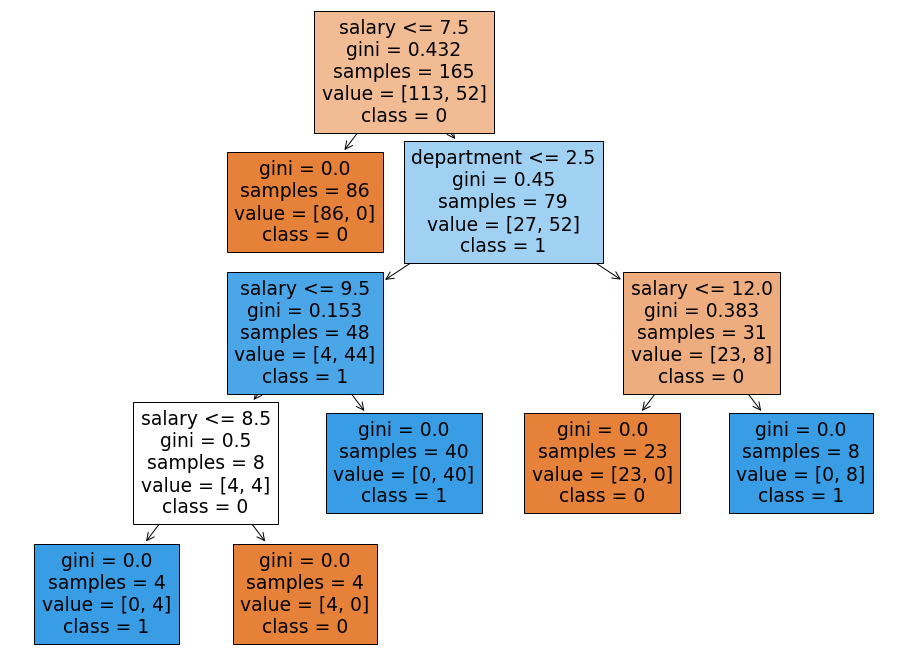

In [11]:
## Plotting and saving no age model
tree_plot_no_age = plt.gcf()
tree_plot_no_age.set_size_inches(16,12)
tree.plot_tree(decision_tree_no_age,
               feature_names = X_no_age.columns,
               class_names = salary_classes,
               filled = True);
tree_plot_no_age.savefig('decision_tree_no_age.png',
                  format = 'png',
                  dip=300)